# loss function

## definition

- Definition of loss: for a data point $x$, loss $L: \mathcal{Y} \times \mathcal{Y} \rightarrow \mathbb{R}$ is a function of predicted response $\hat y$ and true response $y$
$$L=l\left ( \hat{y},y \right )$$

## good loss function

A good loss function should satisfy the following requirements:

- **Differentiable**: it has a well-defined gradient w.r.t the model parameters. This is necessary for the use of gradient-based optimization algorithms such as SGD and its variants.

- Appropriate for the task: e.g., cross-entropy loss for classification tasks, while MSE for regression tasks.

- Sensitive to errors: assigns a high penalty to large errors and a small penalty to small errors. This helps to ensure that the model learns to make accurate predictions and reduces the risk of overfitting.

- Monotonically decreasing: loss decreases as model becomes more accurate. This helps to ensure that optimization converges to a good solution.

- Robust to outliers: not overly affected by a few very large errors, reduces the risk of overfitting. 

## non-convexity of loss function

loss function of a real-world problem is often non-convex with many local minima and maxima due to several reasons:

- High dimensionality

- Non-linear relationships between the input features and the output

- Noisy data 

- over-parameterized DL model 

The non-convexity of the loss function makes optimization of model parameters a challenging problem. 

Optimization algorithms such as gradient descent can get stuck in local minima and fail to find the global minimum. 

However, DL models have been successful in many real-world applications due to availability of large amounts of data, proper regularization techniques and powerful computational resources 

## convex vs. non-convex function

|                  | Convex Functions                                 | Non-convex Functions                         |
|------------------|--------------------------------------------------|----------------------------------------------|
| Global Minimum   | Unique                                           | Not guaranteed to be unique                  |
| Local Minima     | Not present                                      | Present, maybe multiple                      |
| Optimization     | Efficient                                        | Challenging                                  |
| Gradient Descent | Guaranteed to converge to global minimum         | Not guaranteed to converge to global minimum |
| Complexity       | Simple                                           | Complex                                      |
| Applications     | Linear programming, convex optimization problems | Deep learning, real-world problems           |

## critical point

In calculus, a critical point of a function $f(x)$ is a point where derivative of function w.r.t $x$ is either zero or undefined. 

$$
f'(c) = 0 \text{\ or is undefined}
$$

In non-convex functions, there are 5 types of **critical points** that can complicate optimization.

To determine the type of critical point, we need to examine the sign of the second derivative $f''(c)$ at the critical point.

| Critical point type | Definition                                                                                                                           | Second derivative                                            | Optimization impact                              | Solution                                           |
|---------------------|--------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------|--------------------------------------------------|----------------------------------------------------|
| Local minimum       | Function value is smallest in a region but not the global smallest                             | f''(x) > 0                                                   | Algorithm gets stuck, cannot find global minimum | Random restarts, adaptive learning rates, momentum |
| Local maximum       | Function value is larget in a region but not the global largest                             | f''(x) < 0                                                   | Algorithm gets stuck, cannot find global maximum | Random restarts, adaptive learning rates, momentum |
| Saddle point        | Function has a higher value in one direction and a lower value in another direction, but the point is not a local minimum or maximum | f''(x) = 0 in one direction, f''(x) ≠ 0 in another direction | Slow convergence, oscillation                    | Momentum, second-order methods, random restarts    |
| Plateaus            | Flat regions in the function where the derivative is close to zero                                                                   | f''(x) ≈ 0                                                   | Slow convergence                                 | Adaptive learning rates, momentum                  |
| Inflection point    | Point where the curvature of the function changes sign                                                                               | f''(x) = 0                                                   | None                                             | None                                               |

## local minima and saddle points are not problem in deep NN

[The Loss Surfaces of Multilayer Networks](https://arxiv.org/abs/1412.0233)

for deep NN

- global minima: can be multiple, hard to find

- local minima: 

    a large number: due to weight space symmetry (we could modify the neural network by swapping order of hidden nodes), invariance to scale (increase all weights by x 10 has same output)

    most local minima is optimal: loss close to the global minima

    the larger the NN, the higher probability of finding optimal local minima

- saddle point: dominates loss landscape.

    adaptive learning rate with momentum can help escape saddle points 

    for a random loss function, expected ratio of number of saddle points to local minima grow exponentially with number of dimension of loss function

    for a loss function of real NN, **saddle points have high loss**[Goodfellow et al., section 8.2.3]. 

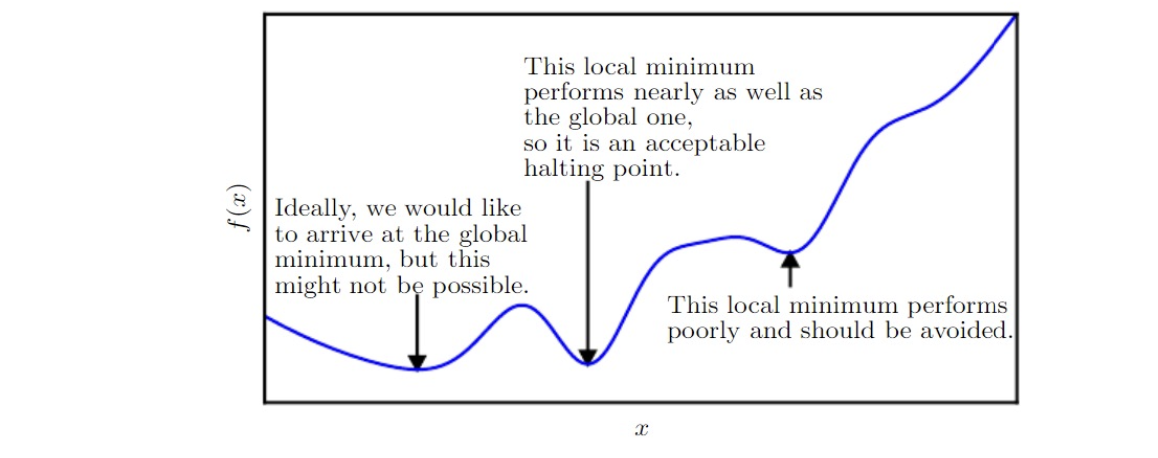

# cross-entropy loss

## multi-class classification

- cross-entropy loss for multi-class classification can be defined as follows:

    \begin{equation}
    \mathcal{L}(\hat{\mathbf{y}}, \mathbf{y}) = -\frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{C} y_{ij} \log(\hat{y}_{ij})=  -\frac{1}{n} \sum_{i=1}^{n} \mathbf{1}^T (\mathbf{y}_i \odot \hat{\mathbf{y}}_i)
    \end{equation}

    where $\hat{\mathbf{y}}_i \in \mathbb{R}^C$ is predicted probability distribution over $C$ classes for ith sample. 
    
    $y_{ij} \in \left\{0,1\right\}$ is the indicator variable that takes value 1 if the $i$-th sample belongs to the $j$-th class.
    
    $\mathbf{y}_i \in \mathbb{R}^C$ is ground truth one-hot encoded label for ith sample. 

    $n$ is the number of samples, $C$ is number of classes

    **Simplified vertion**

    \begin{equation}
        \mathcal{L}(\hat{\mathbf{y}}, y) =  -\frac{1}{n} \sum_{i=1}^{n} \ln {\hat{\mathbf{y}}_i}_{y_i}
        \end{equation}

    Here $y_i \in \left\{0,1, .., C-1\right\}$ is ground truth scalar label for ith sample

    $\hat{\mathbf{y}}_i \in \mathbb{R}^C$ is predicted probability distribution over $C$ classes for ith sample.

- The derivation of the multi-class cross-entropy loss function is based on the negative log-likelihood of the data under a **multinomial distribution**, where $\hat{y}_{ij}$ is the probability of observing the $i$-th sample belonging to class $j$. 

    Assuming that the samples are independently and identically distributed, the likelihood of the predicted probabilities $\hat{y}$ given the true labels $y$ can be written as:

    \begin{equation}
    \mathcal{L}(\hat{y}, y) = \prod_{i=1}^{n} \prod_{j=1}^{C} \hat{y}_{ij}^{y_{ij}}
    \end{equation}

    Maximizing the likelihood is equivalent to minimizing the negative log-likelihood.

    Taking the negative logarithm of the likelihood and averaging over all samples, we obtain the cross-entropy loss. **equivalent to log-likelihood loss with softmax activation**

- **log-likelihood cost with softmax activation** can be expressed as:

    \begin{equation}
    \mathcal{L}(\hat{y}, y) = -\frac{1}{n}\sum_{i=1}^n \sum_{j=1}^C y_{ij} \log(\hat{y}_{ij})
    \end{equation}

    $n$ is the number of samples, $C$ is the number of classes, 

    $y_{ij}$ is the indicator function which is 1 if the $i$-th sample belongs to class $j$, 

    and $\hat{y}_{ij}$ is the predicted probability of the $i$-th sample belonging to class $j$.


- The gradient of the log-likelihood cost with respect to the weight vector $W$ can be expressed as:

    \begin{equation}
    \frac{\partial \mathcal{L}}{\partial W} = \frac{1}{n}X^T (\hat{y} - y)
    \end{equation}

    where $X$ is the input matrix, $\hat{y}$ is the predicted probability distribution over $n$ classes, and $y$ is the true one-hot encoded label.


- The gradient of the log-likelihood cost with respect to the bias vector $b$ can be expressed as:

    \begin{equation}
    \frac{\partial \mathcal{L}}{\partial b} = \frac{1}{n}\sum_{i=1}^{n} (\hat{y_i} - y_i)
    \end{equation}

    $\hat{y}_i = [\hat{y}_{i1}, \hat{y}_{i2}, ..., \hat{y}_{iC}]$ is the predicted probability distribution for the $i$-th sample

    and $y$ is the true one-hot encoded label.

- gradient of cross-entropy loss w.r.t weight matrix $W$ or bias vector $b$ can be expressed as:

    \begin{equation}
    \frac{\partial \mathcal{L}}{\partial W} = \frac{1}{n} X^T (\hat{y} - y)
    \end{equation}

    \begin{equation}
    \frac{\partial \mathcal{L}}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)
    \end{equation}


    where $X$ is the input matrix

## binary classification

- Generalization of binary cross entropy to multi-class is just by summing the binary cross entropy at each neuron

binary cross-entropy loss function is commonly used in binary classification problems, defined as follows:

\begin{equation}
L = -\frac{1}{n} \sum_{i=1}^n [y_i \log \hat{y_i} + (1-y_i) \log (1-\hat{y_i})]
\end{equation}

${(x_i, y_i)}_{i=1}^n$ is a set of $n$ samples, where $x_i \in \mathbb{R}^d$ is the input and $y_i \in \left\{0, 1\right\}$ is the true label of the $i$-th sample. 

$\hat{y_i}$ be the predicted probability that the $i$-th sample belongs to the positive class.

- The derivation of the binary cross-entropy loss function is based on the negative log-likelihood of the data under a Bernoulli distribution, where $\hat{y_i}$ is the probability of observing $y_i = 1$ for the $i$-th sample. 

    Maximizing the likelihood is equivalent to minimizing the negative log-likelihood, which gives rise to the cross-entropy loss.

- The gradient of the binary cross-entropy loss function with respect to the weights and biases can be computed as follows:

\begin{equation}
\frac{\partial L}{\partial w} = -\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y_i}) x_{i}
\end{equation}

\begin{equation}
\frac{\partial L}{\partial b} = -\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y_i})
\end{equation}

## cross-entropy loss vs. quadratic loss

**why cross-entropy loss is better than quadratic loss when activation of outout layer is sigmoid?**

-  gradient of quadratic loss has derivative of sigmoid function, which can be very small when input to sigmoid function is very large or very small. leading to vanishing gradients and slow convergence. 

- In contrast, gradient of CE loss does not involve derivative of sigmoid function $\sigma'(z)$, the gradient is always non-negative, less likely to vanish. rate the weight is learned is controlled by **error in the output** $(\sigma(z) - y)$, the larger the error, faster the neurons learns

gradients of loss w.r.t weight matrix in a NN with sigmoid output layer are

- Cross-entropy loss:
\begin{equation}
\frac{\partial J}{\partial W} = \frac{1}{n} X^T(\sigma(z) - y)
\end{equation}

- Quadratic loss:
\begin{equation}
\frac{\partial J}{\partial W} = \frac{1}{n} X^T(\sigma(z) - y) \odot \sigma'(z)
\end{equation}

where $X$ is the input matrix, $\hat y=\sigma(z)$ is the predicted output matrix, 

$y$ is the true output matrix, and $\odot$ denotes element-wise multiplication.

# loss landscape

## visualization

- loss landscape is located in parameter space

    very high dimension: number of dim of loss landscape = number of parameters in model

- [visualization](https://losslandscape.com/explorer) tells trainability, a smoother landscape is easier to train

- hard to visualize whole landscape

    - subsample random directions

    - subsample around minima

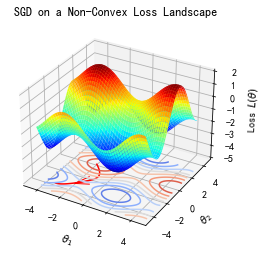

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def loss_function(x, y):
    return -np.sin(x) + 2*np.cos(y)

# Generate data for plotting
x = np.linspace(-4, 5, 100)
y = np.linspace(-5, 3, 100)
X, Y = np.meshgrid(x, y)
Z = loss_function(X, Y)

# Plot the loss landscape in 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, cmap='jet')

# Plot the loss landscape as contour plot
ax.contour(X, Y, Z, zdir='z', offset=-5, cmap='coolwarm')

# Define the SGD optimizer
def sgd_optimizer(x, y, lr=0.1, steps=50):
    path = []
    for i in range(steps):
        dx = -np.cos(y) # Compute the gradient w.r.t x
        dy = -np.sin(x) # Compute the gradient w.r.t y
        x -= lr * dx # Update x
        y -= lr * dy # Update y
        loss = loss_function(x, y) # Compute the loss
        path.append((x, y, loss)) # Add the current point to the path
    return path

# Run SGD and plot the path
x_start, y_start = -2, 0 # Starting point for SGD
path = sgd_optimizer(x_start, y_start)
x_path = [p[0] for p in path]
y_path = [p[1] for p in path]
z_path = [p[2] for p in path]

ax.plot(x_path, y_path, zs=-5, zdir='z', color='red')
ax.quiver(x_path[25], y_path[25], -5,
          x_path[30]-x_path[25], y_path[30]-y_path[25], 0,
          color='red', length=2, linewidth=1, arrow_length_ratio=1)

# Set the title and axis labels
ax.set(xlim=(-5, 5), ylim=(-5, 5), zlim=(-5, 2),
       xlabel=r'$\theta_1$', ylabel=r'$\theta_2$', zlabel=r'Loss $L(\theta)$', 
       title='SGD on a Non-Convex Loss Landscape')
plt.show()


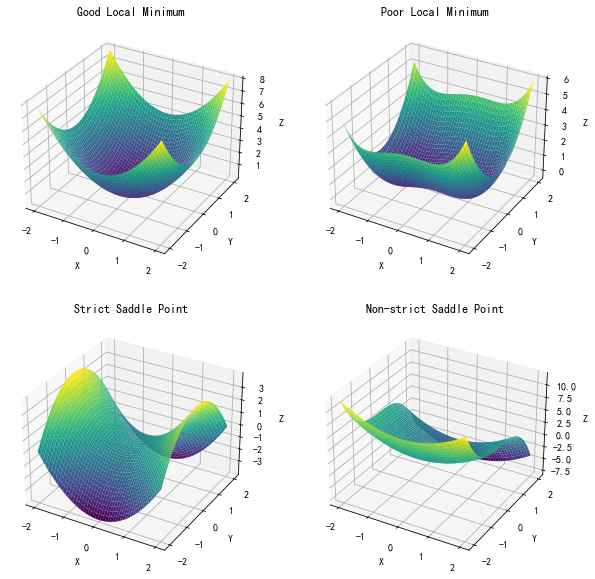

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions for the subplots
def good_local_min(x, y):
    return x**2 + y**2

def poor_local_min(x, y):
    return 0.2*x**4 - 0.4*x**2 + 0.2*x + y**2

def strict_saddle_point(x, y):
    return x**2 - y**2

def nonstrict_saddle_point(x, y):
    return x**2 - y**3

# Generate data for plotting
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)

# Evaluate the functions for each point in the grid
Z1 = good_local_min(X, Y)
Z2 = poor_local_min(X, Y)
Z3 = strict_saddle_point(X, Y)
Z4 = nonstrict_saddle_point(X, Y)

# Set up the plot
fig = plt.figure(figsize=(10,10))

# Create the subplots
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax4 = fig.add_subplot(2, 2, 4, projection='3d')

# Plot the surfaces
ax1.plot_surface(X, Y, Z1, cmap='viridis')
ax2.plot_surface(X, Y, Z2, cmap='viridis')
ax3.plot_surface(X, Y, Z3, cmap='viridis')
ax4.plot_surface(X, Y, Z4, cmap='viridis')

# Set the titles and labels
ax1.set_title('Good Local Minimum')
ax2.set_title('Poor Local Minimum')
ax3.set_title('Strict Saddle Point')
ax4.set_title('Non-strict Saddle Point')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
ax4.set_zlabel('Z')

# Show the plot
plt.show()


## factors of loss landscape and SGD path

These factors interplay in complex ways

understanding their effects on the loss landscape and the SGD path can help design better neural networks and optimization strategies.

Loss Landscape:

- Loss function: choice of loss function (e.g., MSE, cross-entropy, hinge loss) determines **shape** of loss landscape.

- Network architecture: 

    choice of layers  (e.g., convolutional, recurrent, fully connected), 
    
    **connectivity** (skip-connection is smoother)

    width: **wider -> smoother** loss landscape as they have more parameters and higher expressive capacity. wider -> more optimal local minima

    depth: deeper -> more complex and non-linear loss landscape. path between local minima is flat.

- Activation functions: introduce different non-linearities in loss landscape

- Regularization: affect **smoothness and curvature** of the loss landscape.

- Data distribution: inherent complexity of problem

SGD Path:

- model architecture: 

- Initialization: influence starting point in loss landscape and the ease of optimization.

- Stopping criteria: such as using early stopping based on validation performance, influences the end point at loss lanscape is whether local minima or global minima.

- data augmentation: The presence of noise in the data affects the stochasticity of the SGD path, easy to escape local minima and plateaus.

- Learning rate: controls step size for parameter updates and affects rate of convergence and ability to escape saddle points or local minima.

- Batch size: influences noise in gradient estimates and trade-off between computation efficiency and convergence stability. small batch size converges to flatter minima and generalize better.

- Momentum: speed up convergence and escape saddle points by considering the history of gradient updates.

- Adaptive learning rates: Algorithms like Adam, RMSprop, and AdaGrad can adapt the learning rate for each parameter, improving the convergence speed and robustness to different problems.

- Learning rate schedule: Using a learning rate schedule (e.g., step decay, exponential decay, cosine annealing) can help improve convergence by adapting the learning rate during training.

## deep NN has no barriers between local minima

[Essentially No Barriers in Neural Network Energy Landscape](https://arxiv.org/pdf/1803.00885.pdf)

- for a deep NN with enough capacity, **path between local minimas in both training and test loss landscape is flat**, which means no bad local minima, model can generalize well

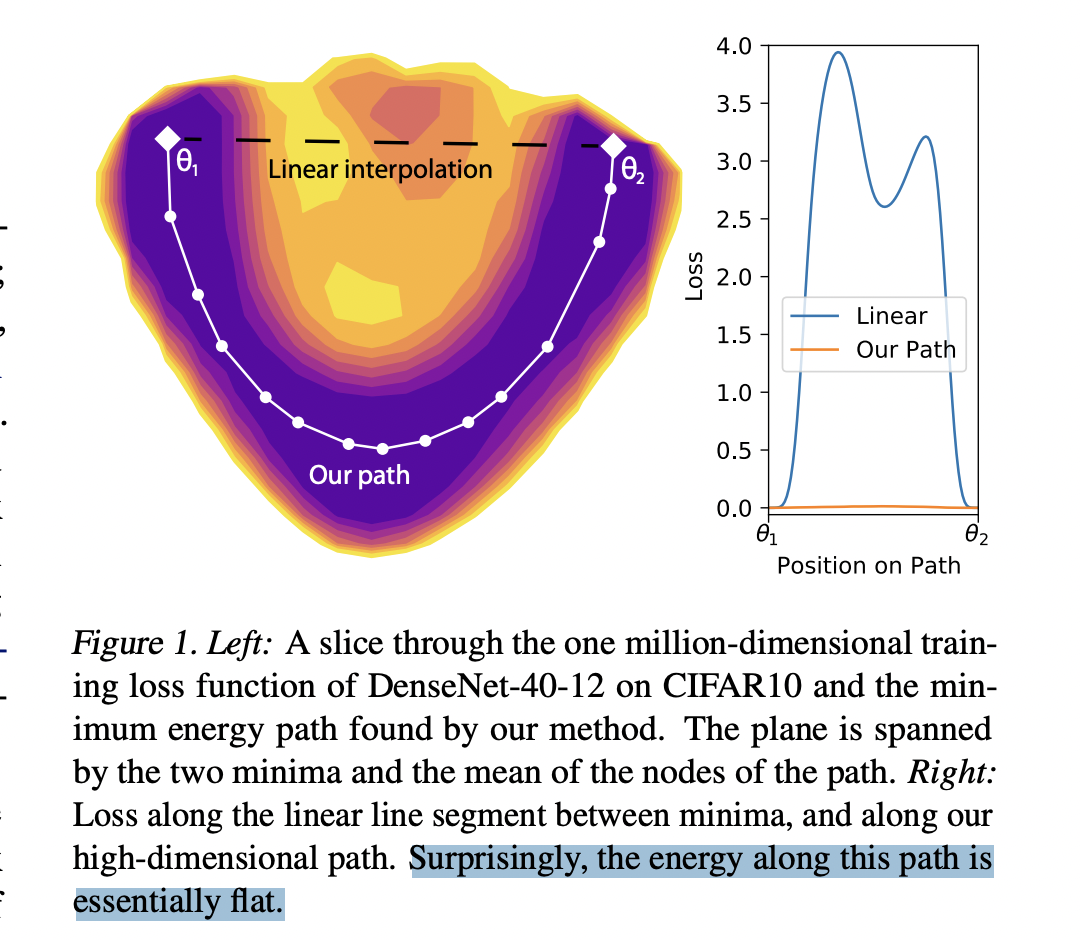

## smoothness vs. curvature

- Both curvature and smoothness can provide insights into the optimization process and the behavior of optimization algorithms in machine learning.

- Smoothness describes **overall** shape of loss landscape - how "smooth" or "rough" 

    A smooth function has **continuous derivatives** with no sudden changes or discontinuities. 
    
    smooth loss functions are generally easier to optimize, as the gradients provide meaningful information for optimization algorithms to follow. 

- curvature describes **local** shape of loss landscape around a specific point - how "flat" or "sharp"

    a flat minima generalize better than a sharp minima

    reason: position of flat minima in training loss landscape and that in test loss landscape don't shift much while position of sharp minima shift a lot.

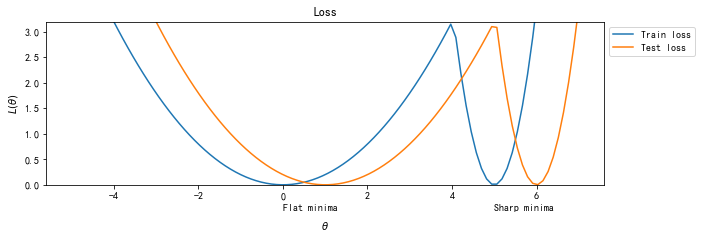

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions
def train(x):
    return np.hstack((x[x<4]**2*0.2, (x[x>=4]-5)**2*3.5))

def test(x):
    return train(x-1)

# Define the x range
x = np.linspace(-5, 7, 100)

plt.figure(figsize=(10, 3))
# Plot the functions
plt.plot(x, train(x), label='Train loss')
plt.plot(x, test(x), label='Test loss')

plt.xlabel(r'$\theta$', labelpad=20)
plt.ylabel(r'$L(\theta)$')
plt.ylim(0, 3.2)
plt.title('Loss')
plt.legend(bbox_to_anchor=(1, 1))
plt.annotate("Flat minima", xy=(0, 0), xytext=(0, -0.5), annotation_clip=False)
plt.annotate("Sharp minima", xy=(5, 0), xytext=(5, -0.5), annotation_clip=False)
plt.show()
